## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [1]:
import os
from tensorflow import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

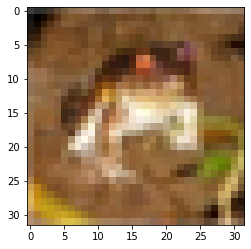

In [9]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

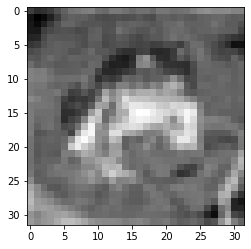

In [10]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

### 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

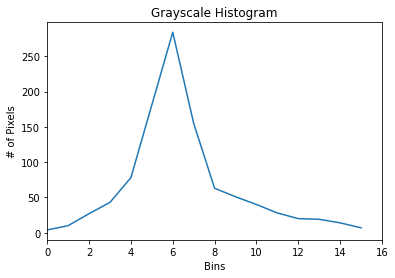

In [61]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
# 切為16個區間 (bins), 觀察各區間的pixel總數(count數)
hist = cv2.calcHist([gray], [0], None, [16], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 16])
plt.show()

In [56]:
hist

array([[  4.],
       [ 10.],
       [ 27.],
       [ 43.],
       [ 78.],
       [181.],
       [284.],
       [155.],
       [ 63.],
       [ 51.],
       [ 40.],
       [ 28.],
       [ 20.],
       [ 19.],
       [ 14.],
       [  7.]], dtype=float32)

In [57]:
# 在 [16, 32] 這個 bin 中有多少個 pixel？ 
print("hist shape:", hist.shape, "\n直方圖中在 [16, 32] 這個 bin有 ", hist[1], "個 pixel") 

hist shape: (16, 1) 
直方圖中在 [16, 32] 這個 bin有  [10.] 個 pixel


In [58]:
# 此image總共有1024個pixels
import numpy as np

np.sum(hist[:])

1024.0

Channel(r):在 [16, 32] 這個 bin有 [4.] 個 pixels
Channel(g):在 [16, 32] 這個 bin有 [17.] 個 pixels
Channel(b):在 [16, 32] 這個 bin有 [108.] 個 pixels


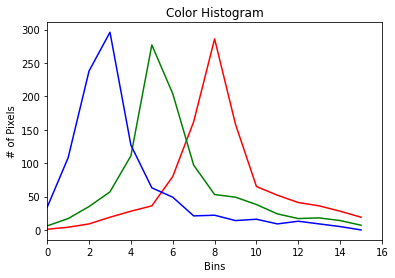

In [62]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
# 畫出 RGB 三種顏色的分佈圖
colors = ('r','g','b')
plt.figure()
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [16], [0, 256])
    print(f'Channel({color}):在 [16, 32] 這個 bin有 {hist[1]} 個 pixels')
    plt.plot(hist, color = color)
    
plt.xlim([0, 16])
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.show()


Channel(r):在 [16, 32] 這個 bin有 [4.] 個 pixels
Channel(g):在 [16, 32] 這個 bin有 [17.] 個 pixels
Channel(b):在 [16, 32] 這個 bin有 [108.] 個 pixels


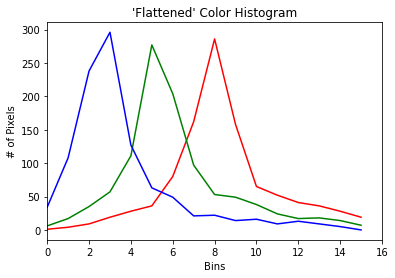

In [64]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    print(f'Channel({color}):在 [16, 32] 這個 bin有 {hist[1]} 個 pixels')
    
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 16])
plt.show()